### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)
from IPython.core.pylabtools import figsize
from scipy.stats import percentileofscore
from scipy import stats

# model selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Anaconda\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Anaconda\

In [2]:
df = pd.read_csv('student-mat.csv')
print(df.head())
df.describe()

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [4]:
for col in list(df):
    print(col)
    print(np.sort(df[col].unique()))
    print(df[col].value_counts())

school
['GP' 'MS']
GP    349
MS     46
Name: school, dtype: int64
sex
['F' 'M']
F    208
M    187
Name: sex, dtype: int64
age
[15 16 17 18 19 20 21 22]
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
address
['R' 'U']
U    307
R     88
Name: address, dtype: int64
famsize
['GT3' 'LE3']
GT3    281
LE3    114
Name: famsize, dtype: int64
Pstatus
['A' 'T']
T    354
A     41
Name: Pstatus, dtype: int64
Medu
[0 1 2 3 4]
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
Fedu
[0 1 2 3 4]
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
Mjob
['at_home' 'health' 'other' 'services' 'teacher']
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
Fjob
['at_home' 'health' 'other' 'services' 'teacher']
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
reason
['course' 'home' 'other' 'reputation']
cour

### Plotting the dependent variable

Text(0.5, 1.0, 'Distribution of Final Grades')

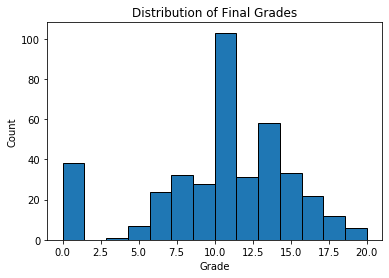

In [5]:
plt.hist(df['G3'], bins = 14,fill = 'navy',edgecolor = 'k')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')

#plt.bar(df['G3'].value_counts().index, 
#        df['G3'].value_counts().values,
#         fill = 'navy', edgecolor = 'k', width = 1)
#plt.xticks(list(range(5, 20)))

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Density Plot of Final Grades by Guardian')

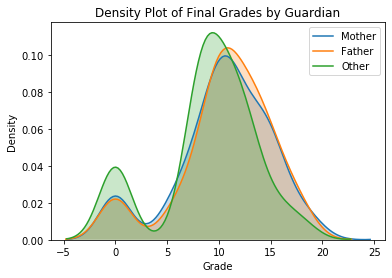

In [6]:
3## Grade distribution with respect to guardian

sns.kdeplot(df.loc[df['guardian'] == 'mother', 'G3'], 
            label = 'Mother', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'father', 'G3'], 
            label = 'Father', shade = True)
sns.kdeplot(df.loc[df['guardian'] == 'other', 'G3'], 
            label = 'Other', shade = True)
# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Guardian')

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Density Plot of Final Grades by Location')

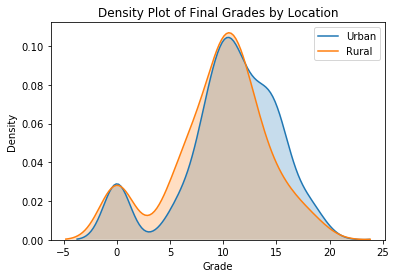

In [7]:
### Grade distributoin with repect to location

sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], 
            label = 'Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], 
            label = 'Rural', shade = True)
# Add labeling
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Location')

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


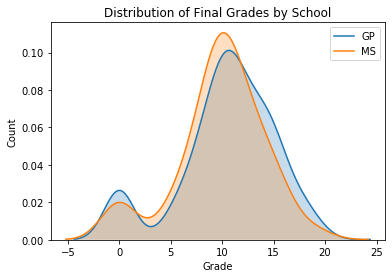

In [8]:
# Grade distribution by school
sns.kdeplot(df.loc[df['school'] == 'GP', 'G3'], label = 'GP', shade = True)
sns.kdeplot(df.loc[df['school'] == 'MS', 'G3'], label = 'MS', shade = True)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades by School');

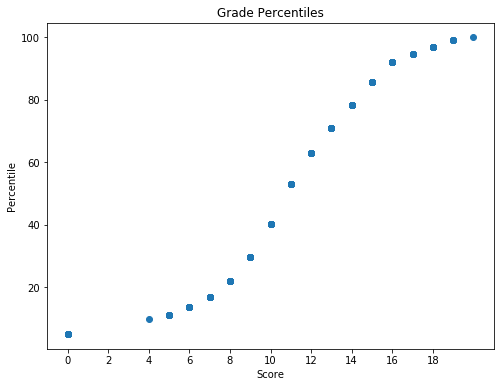

In [9]:
### Grade percentiles
df['percentile'] = df['G3'].apply(lambda x: percentileofscore(df['G3'], x))

# Plot percentiles for grades
plt.figure(figsize = (8, 6))
plt.plot(df['G3'], df['percentile'], 'o')
plt.xticks(range(0, 20, 2), range(0, 20, 2))
plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('Grade Percentiles');

In [10]:
print('50th percentile:',min(df.loc[df['percentile']>50,'G3']))
print('90th percentile:',min(df.loc[df['percentile']>90,'G3']))

50th percentile: 11
90th percentile: 16


### Correlations 

In [11]:
df.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
percentile    0.946490
G3            1.000000
Name: G3, dtype: float64

In [12]:
# Select only categorical variables
category_df = df.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['G3'] = df['G3']
# Find correlations with grade
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

In [14]:
labels = df['G3']
df1 = df.drop(columns=['school', 'G1', 'G2', 'percentile'])

df1 = pd.get_dummies(df1)
    
# Find correlations with the Grade
most_correlated = df1.corr().abs()['G3'].sort_values(ascending=False)
print(most_correlated) 
# Maintain the top 6 most correlation features with Grade
most_correlated = most_correlated[:8]
    
df1 = df1.loc[:, most_correlated.index]    
# Split into training/testing sets with 25% split
# df is features and labels are the targets 
# Split by putting 25% in the testing set
X_train, X_test, y_train, y_test = train_test_split(df1, labels, test_size = 0.25,random_state=42)

G3                   1.000000
failures             0.360415
Medu                 0.217147
higher_yes           0.182465
higher_no            0.182465
age                  0.161579
Fedu                 0.152457
goout                0.132791
romantic_no          0.129970
romantic_yes         0.129970
traveltime           0.117142
Mjob_health          0.116158
Mjob_at_home         0.115634
address_U            0.105756
address_R            0.105756
sex_F                0.103456
sex_M                0.103456
paid_no              0.101996
paid_yes             0.101996
reason_course        0.098950
internet_yes         0.098483
internet_no          0.098483
studytime            0.097820
Mjob_other           0.096477
reason_reputation    0.095692
Fjob_teacher         0.095374
guardian_other       0.087774
schoolsup_yes        0.082788
schoolsup_no         0.082788
famsize_GT3          0.081407
famsize_LE3          0.081407
Mjob_services        0.078429
health               0.061335
Pstatus_T 

In [15]:
X_train.head(2)

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout
16,14,0,4,1,0,16,4,3
66,12,0,4,1,0,15,4,3


In [16]:
print(X_train.shape)
print(X_test.shape)

(296, 8)
(99, 8)


### Pair plots of selected variables

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and wi

C:\Anaconda\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
C:\Users\nilak\AppData\Roaming\Python\Python36\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\nilak\AppData\Roaming\Python\Python36\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Anaconda\lib\site-packages\seaborn\distributions.py:400: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:400: UserWarning: The following kwa

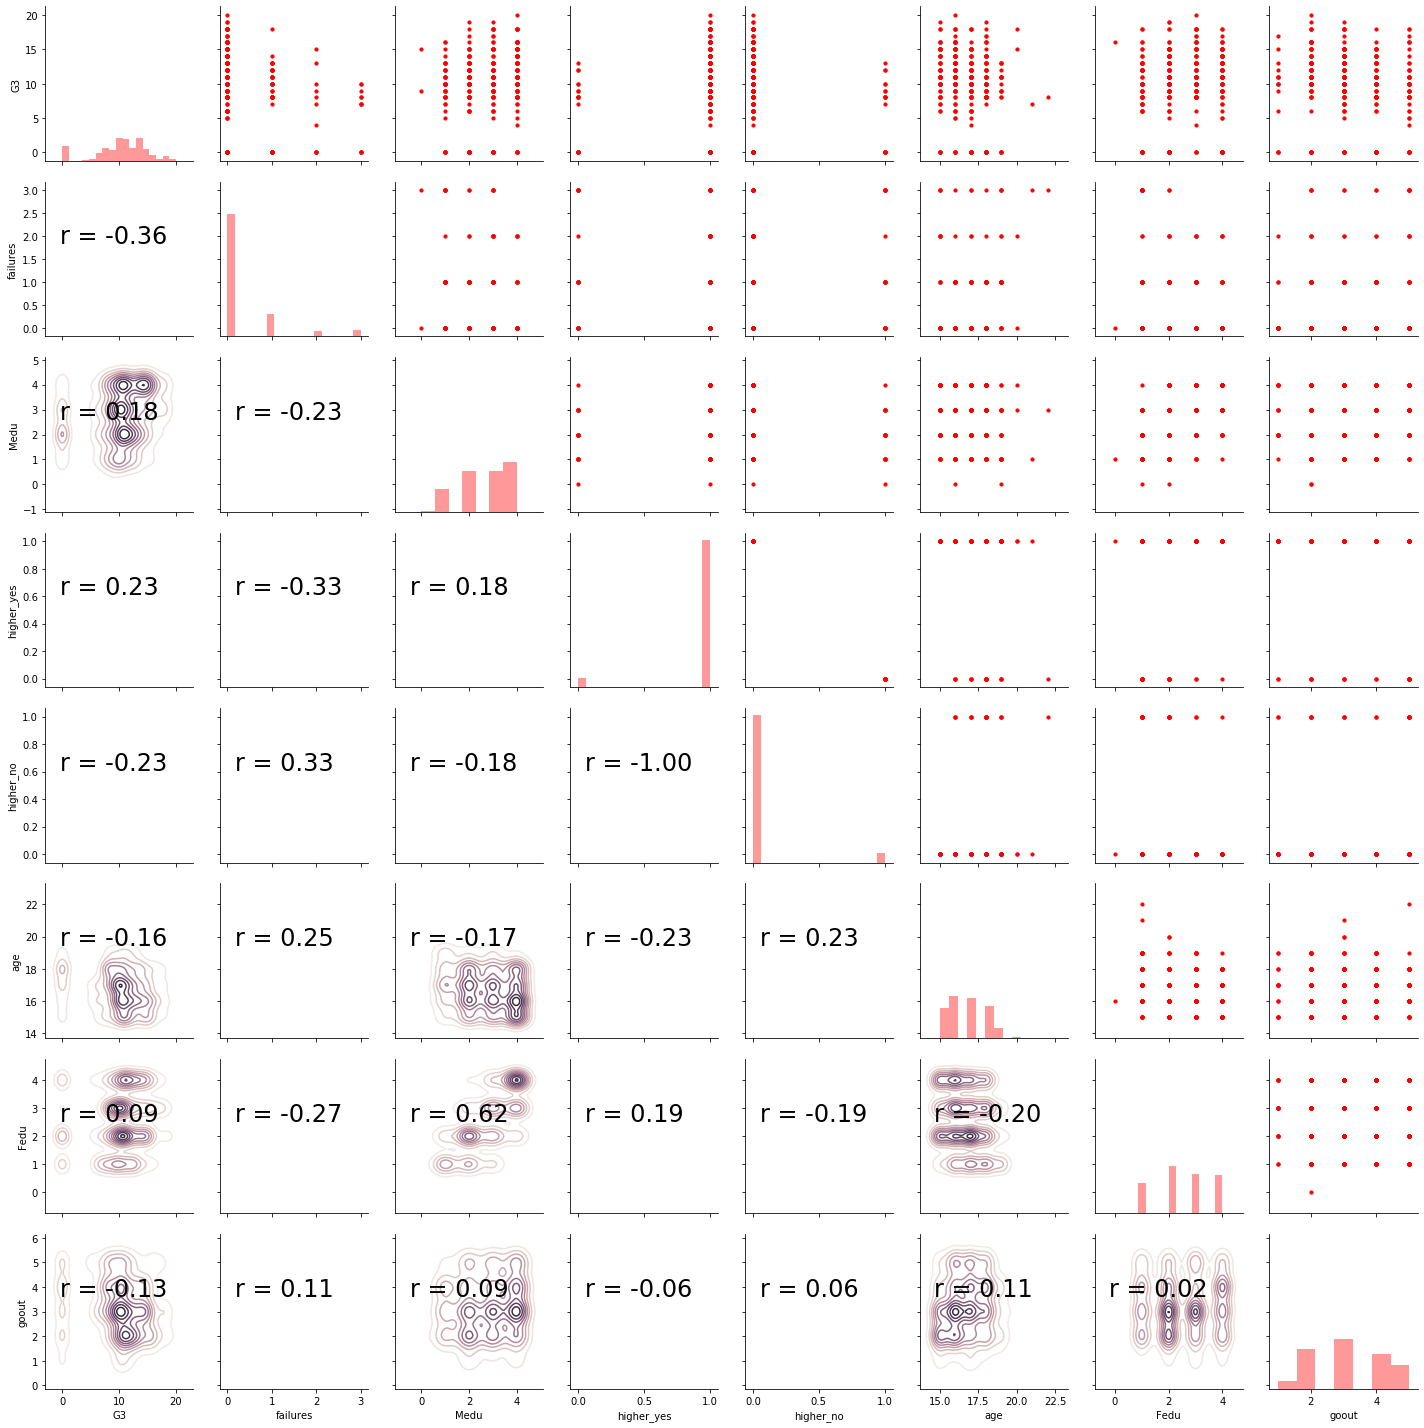

In [17]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [18]:
X_plot = X_train.copy()
# Compare grades to the median
X_plot['relation_median'] = (X_plot['G3'] >= 12)
X_plot['relation_median'] = X_plot['relation_median'].replace({True: 'above', False: 'below'})

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ValueError: num must be 1 <= num <= 6, not 7

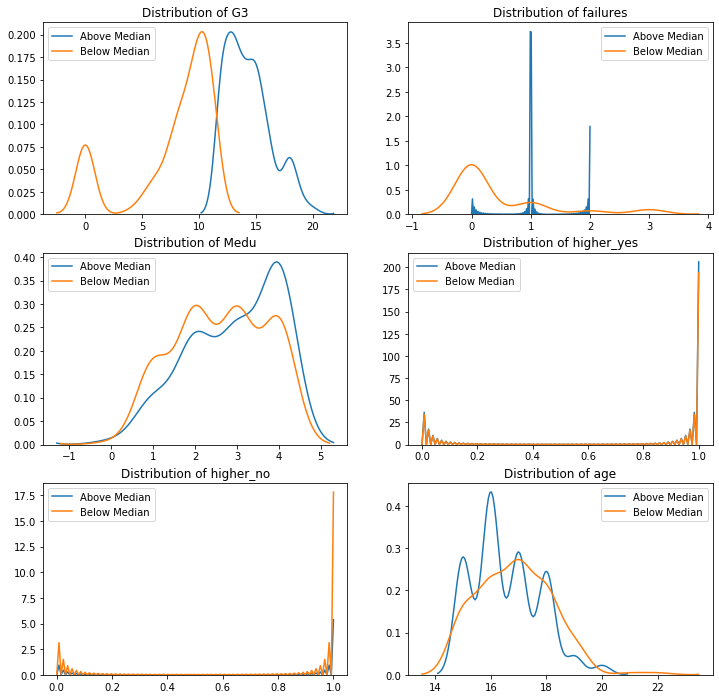

In [19]:
                                    
# Plot all variables in a loop
plt.figure(figsize=(12, 12))
for i, col in enumerate(X_plot.columns[:-1]):
    plt.subplot(3, 2, i + 1)
    subset_above = X_plot[X_plot['relation_median'] == 'above']
    subset_below = X_plot[X_plot['relation_median'] == 'below']
    sns.kdeplot(subset_above[col], label = 'Above Median')
    sns.kdeplot(subset_below[col], label = 'Below Median')
    plt.legend()
    plt.title('Distribution of %s' % col)
    
plt.tight_layout()